In [277]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
# from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [278]:
def getDataset(file):
    df = pd.read_csv(file, sep='\t')
    return df.iloc[:,:5], df.iloc[:,5:]

# display(getDataset('master means/26C_mean_masterFile.tsv').head(5))

In [276]:
def getDescriptions(file):
    df = pd.read_csv(file, sep='\t')
    return df.iloc[:, :5]

In [320]:
# def plotElbow(file, scaler = StandardScaler()):
#     dataset = getDataset(file)
#     #scale = StandardScaler().fit_transform(dataset) #normalize values
#     scale = scaler.fit_transform(dataset)
    
#     kmeans_kwargs = {
#         "init" : "k-means++",
#         "random_state" : 1,
#         "n_init": 'auto',
#         "max_iter": 400
#     }

#     distortions = []
#     for k in range(1,11):
#         kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#         kmeans.fit_transform(scale)
#         distortions.append(kmeans.inertia_)
    
#     plt.plot(range(1,11), distortions)
#     plt.xticks(range(1,11))
#     plt.xlabel("# of clusters")
#     plt.ylabel("distortions")
#     plt.show()

#     # km = KMeans(**kmeans_kwargs)
#     # vis = KElbowVisualizer(km, k=(1,11))
#     # vis.fit(scale)
#     # vis.show()


In [321]:
# def cluster(file, n_clusters: int, names: list, scaler = StandardScaler()):
#     dataset = getDataset(file)
#     scaled_ds = scaler.fit_transform(dataset[1])

#     # scaled_ds = dataset

#     kmeans_kwargs = {
#         "init" : "k-means++",
#         "random_state" : 1,
#         "n_init": 'auto',
#         "max_iter": 400
#     }

#     kmeans = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
#     kmeans.fit_transform(scaled_ds)
#     y = kmeans.predict(scaled_ds)
    
#     normDf = pd.DataFrame(scaled_ds, columns=names)

#     df = getDescriptions(file)
#     df = pd.concat([df, normDf], axis=1)
#     df['cluster'] = y
    
#     centers = kmeans.cluster_centers_
#     #print(centers)
#     x = plt.scatter(df.iloc[:, 5],df.iloc[:, 8], c=df['cluster'], cmap=plt.cm.tab20b)
#     x = plt.scatter(df.iloc[:, 6],df.iloc[:, 8], c=df['cluster'], cmap=plt.cm.tab20b)
#     x = plt.scatter(df.iloc[:, 7],df.iloc[:, 8], c=df['cluster'], cmap=plt.cm.tab20b)
#     #plt.xlim([0,10000])
#     #plt.ylim([0,10000])

#     # for i in range(3):
#     #     plt.scatter(centers[:, 2], centers[:, i], c='black')
#     plt.show()


#     return df.drop(df.columns[0], axis=1)



In [326]:
def dataProcess(file, names: list):
    desc, dataset = getDataset(file)
    dataset = dataset.to_numpy()
    dataset = dataset.astype(np.float64)
    df = pd.DataFrame(dataset, columns = names)
    
    # zeroDf = df[(df[names] <= 0.9).all(axis=1)] 
    # display(zeroDf.head(20))

    for c in df.columns:
        df[c] = np.log2(df[c])
    
    # zeroDf = df[(df == np.inf).any(axis=1)] 
    # display(zeroDf)
    
    df = pd.concat([desc, df], axis=1)

    df = df.replace([np.inf, -np.inf], 0)
    return df.iloc[:,:5], df.iloc[:,5:]


In [327]:
def plotElbow(file, names: list, scaler = StandardScaler()):
    desc, scaled_ds = dataProcess(file, names=names)

    kmeans_kwargs = {
        "init" : "k-means++",
        "random_state" : 1,
        "n_init": 'auto',
        "max_iter": 400
    }

    scaled_ds = scaler.fit_transform(scaled_ds)

    distortions = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit_transform(scaled_ds)
        distortions.append(kmeans.inertia_)
    
    plt.plot(range(1,11), distortions)
    plt.xticks(range(1,11))
    plt.xlabel("# of clusters")
    plt.ylabel("distortions")
    plt.show()

    # km = KMeans(**kmeans_kwargs)
    # vis = KElbowVisualizer(km, k=(1,11))
    # vis.fit(scale)
    # vis.show()


In [328]:
def cluster(file, n_clusters: int, names: list, scaler = StandardScaler()):
    desc, scaled_ds = dataProcess(file, names)
    kmeans_kwargs = {
        "init" : "k-means++",
        "random_state" : 1,
        "n_init": 'auto',
        "max_iter": 400
    }

    scaled_ds = scaler.fit_transform(scaled_ds)

    kmeans = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    kmeans.fit(scaled_ds)
    y = kmeans.predict(scaled_ds)
    
    normDf = pd.DataFrame(scaled_ds, columns=names)

    df = getDescriptions(file)
    df = pd.concat([desc, normDf], axis=1)
    df['cluster'] = y
    
    centers = kmeans.cluster_centers_
    #print(centers)
    x = plt.scatter(df.iloc[:, 5],df.iloc[:, 8], c=df['cluster'], cmap=plt.cm.tab20b)
    x = plt.scatter(df.iloc[:, 6],df.iloc[:, 8], c=df['cluster'], cmap=plt.cm.tab20b)
    x = plt.scatter(df.iloc[:, 7],df.iloc[:, 8], c=df['cluster'], cmap=plt.cm.tab20b)
    #plt.xlim([0,10000])
    #plt.ylim([0,10000])

    # for i in range(3):
    #     plt.scatter(centers[:, 2], centers[:, i], c='black')
    plt.show()


    return df.drop(df.columns[0], axis=1)



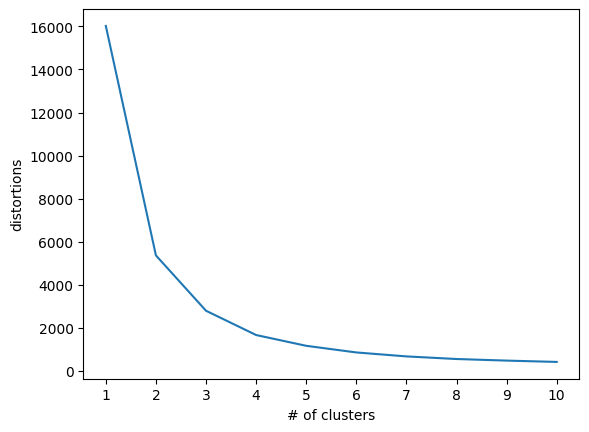

In [312]:
names = ['pil', 'pcnB', 'pil-pcnB', 'WT']
plotElbow('master means/26C_mean_masterFile.tsv', names=names)

/home/derfelt/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


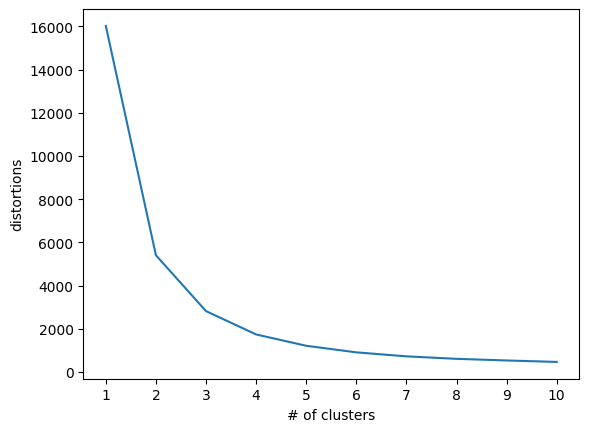

In [313]:
names = ['pil', 'pcnB', 'pil-pcnB', 'WT']
plotElbow('master means/37C_mean_masterFile.tsv', names=names)

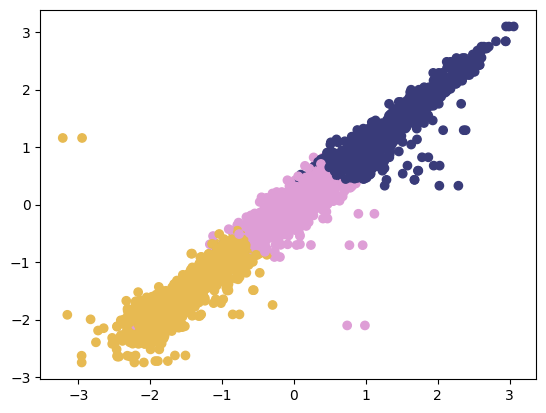

0


,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
0,DN756_00005,dnaA,chromosomal replication initiator protein DnaA,CDS,1.113522,1.130761,1.138271,1.114921,0
1,DN756_00010,NaN,DNA polymerase III subunit beta,CDS,0.954250,1.008512,1.012886,0.956040,0
2,DN756_00020,recF,DNA replication/repair protein RecF,CDS,0.856005,0.868872,0.906460,0.859382,0
3,DN756_00025,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,1.720596,1.767203,1.775215,1.721396,0
11,DN756_00065,ibpB,heat shock chaperone IbpB,CDS,0.771850,0.611819,0.513149,1.083134,0
...,...,...,...,...,...,...,...,...,...
3993,DN756_21985,NaN,translocation protein YopH,CDS,1.254481,0.414882,1.036693,0.804279,0
3995,DN756_21995,NaN,EscJ/YscJ/HrcJ family type III secretion inner...,CDS,1.144081,0.281060,0.910103,0.664630,0
3996,DN756_22000,NaN,translocation protein YopK,CDS,1.011901,0.151287,0.787742,0.468398,0
3998,DN756_22010,NaN,translocation protein YopM,CDS,0.965827,0.079649,0.719834,0.444781,0


1


,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
5,DN756_00035,NaN,hypothetical protein,CDS,-1.960598,-2.156993,-2.058404,-1.832323,1
9,DN756_00055,NaN,YceK/YidQ family lipoprotein,CDS,-0.712147,-0.692759,-0.800700,-0.710994,1
17,DN756_00110,NaN,hypothetical protein,CDS,-1.000594,-1.135156,-1.005971,-1.048172,1
19,DN756_00120,NaN,N-acetyltransferase,CDS,-0.951595,-0.873258,-0.977057,-0.935847,1
21,DN756_00130,NaN,hypothetical protein,CDS,-1.533808,-1.551306,-1.693754,-1.510719,1
...,...,...,...,...,...,...,...,...,...
3963,DN756_21835,NaN,IS6 family transposase,CDS,-0.983526,-1.801537,-1.087574,-1.647571,1
3984,DN756_21940,yscW,type III secretion system chaperone YscW,CDS,-0.475444,-1.301048,-0.661966,-1.186278,1
4001,DN756_22025,NaN,transposase,CDS,-0.915887,-1.572143,-0.930369,-1.373479,1
4003,DN756_22035,NaN,IS66 family transposase,CDS,-2.317048,-2.953286,-2.459622,-2.628743,1


2


,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
4,DN756_00030,NaN,sugar-phosphatase,CDS,-0.146892,-0.090954,-0.077938,-0.151479,2
6,DN756_00040,NaN,ornithine cyclodeaminase family protein,CDS,0.280889,0.354167,0.323013,0.326694,2
7,DN756_00045,NaN,threonine/serine dehydratase,CDS,0.304416,0.349772,0.313842,0.362971,2
8,DN756_00050,NaN,DUF3748 domain-containing protein,CDS,0.372913,0.407529,0.360896,0.434529,2
10,DN756_00060,NaN,heat shock protein IbpA,CDS,0.500668,0.410678,0.273996,0.821135,2
...,...,...,...,...,...,...,...,...,...
3994,DN756_21990,NaN,EscI/YscI/HrpB family type III secretion syste...,CDS,0.787673,-0.055067,0.570095,0.348741,2
3997,DN756_22005,NaN,HrpE/YscL family type III secretion apparatus ...,CDS,0.634978,-0.216113,0.474451,0.067056,2
3999,DN756_22015,NaN,hypothetical protein,CDS,0.049980,-0.846727,-0.269455,-0.455180,2
4000,DN756_22020,NaN,IS3 family transposase,CDS,0.068147,-0.735465,-0.073713,-0.473070,2


In [330]:
names = ['pil', 'pcnB', 'pil-pcnB', 'WT']

n_clusters = 3

df = cluster(file='master means/26C_mean_masterFile.tsv', n_clusters = n_clusters, names=names)
#df.to_csv('testLog2.tsv', sep='\t')
for i in range(n_clusters):
    print(i)
    display(df.loc[df['cluster'] == i])

/home/derfelt/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


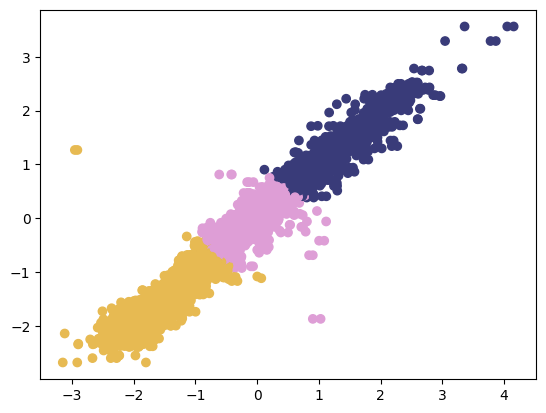

0


,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
0,DN756_00005,dnaA,chromosomal replication initiator protein DnaA,CDS,1.237642,1.318235,1.265577,1.383344,0
1,DN756_00010,NaN,DNA polymerase III subunit beta,CDS,1.006517,1.071669,0.987474,1.107637,0
2,DN756_00020,recF,DNA replication/repair protein RecF,CDS,0.803466,0.935708,0.758128,0.941348,0
3,DN756_00025,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,1.651409,1.739423,1.697399,1.686011,0
14,DN756_00095,NaN,alpha-amylase,CDS,0.807455,0.769390,0.508532,0.981284,0
...,...,...,...,...,...,...,...,...,...
3997,DN756_22005,NaN,HrpE/YscL family type III secretion apparatus ...,CDS,1.389784,1.094334,1.363844,1.096466,0
3998,DN756_22010,NaN,translocation protein YopM,CDS,1.438592,0.891281,1.396470,0.897385,0
4000,DN756_22020,NaN,IS3 family transposase,CDS,1.047278,0.357361,1.120665,0.407668,0
4002,DN756_22030,NaN,tyrosine-protein phosphatase YopH,CDS,4.156970,3.361693,4.052540,3.563345,0


1


,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
5,DN756_00035,NaN,hypothetical protein,CDS,-1.957204,-1.927751,-1.860034,-1.993363,1
17,DN756_00110,NaN,hypothetical protein,CDS,-0.949471,-1.077058,-0.914956,-1.016850,1
19,DN756_00120,NaN,N-acetyltransferase,CDS,-0.870694,-0.890829,-0.829784,-0.830376,1
21,DN756_00130,NaN,hypothetical protein,CDS,-1.542386,-1.964765,-1.574137,-1.742896,1
31,DN756_00180,NaN,hypothetical protein,CDS,-1.740140,-1.803554,-1.644263,-2.110734,1
...,...,...,...,...,...,...,...,...,...
3956,DN756_21795,NaN,cysteine protease,CDS,-0.320117,-1.308478,-0.411484,-1.167254,1
3958,DN756_21810,NaN,IS6 family transposase,CDS,-0.462110,-1.295860,-0.672770,-1.132122,1
3960,DN756_21820,NaN,transposase,CDS,-1.044902,-1.305910,-0.836767,-1.307595,1
3963,DN756_21835,NaN,IS6 family transposase,CDS,-0.656549,-1.131744,-0.904285,-1.047532,1


2


,Locustag,Gene,Description,FeatureType,pil,pcnB,pil-pcnB,WT,cluster
4,DN756_00030,NaN,sugar-phosphatase,CDS,-0.263144,-0.244119,-0.261579,-0.188283,2
6,DN756_00040,NaN,ornithine cyclodeaminase family protein,CDS,0.088757,0.155568,0.234332,0.138930,2
7,DN756_00045,NaN,threonine/serine dehydratase,CDS,0.069269,0.098283,0.162083,0.122836,2
8,DN756_00050,NaN,DUF3748 domain-containing protein,CDS,0.266333,0.320247,0.348852,0.273310,2
9,DN756_00055,NaN,YceK/YidQ family lipoprotein,CDS,0.031501,-0.538138,-0.342601,-0.459851,2
...,...,...,...,...,...,...,...,...,...
3962,DN756_21830,NaN,hypothetical protein,CDS,0.000268,-0.931868,0.156034,-0.588879,2
3984,DN756_21940,yscW,type III secretion system chaperone YscW,CDS,-0.006767,-0.341374,0.107758,-0.260817,2
3999,DN756_22015,NaN,hypothetical protein,CDS,0.692187,0.070877,0.623091,0.081969,2
4001,DN756_22025,NaN,transposase,CDS,-0.274685,-0.808209,-0.283214,-0.780937,2


In [317]:
names = ['pil', 'pcnB', 'pil-pcnB', 'WT']

n_clusters = 3

df = cluster(file='master means/37C_mean_masterFile.tsv', n_clusters = n_clusters, names=names)

for i in range(n_clusters):
    print(i)
    display(df.loc[df['cluster'] == i])